In [9]:
using AutoRisk
using AutoViz
using Interact
using NGSIM
using Records
using Reel
Reel.set_output_type("gif");

In [10]:
# add three vehicles and specifically check neighbor features
num_veh = 2
# one lane roadway
roadway = NGSIM.ROADWAY_101
scene = Scene(num_veh)

models = Dict{Int, DriverModel}()

# 1: first vehicle, moving the fastest
models[1] = Tim2DDriver(.1)
road_idx = RoadIndex(proj(VecSE2(0.0, 0.0, 0.0), roadway))
base_speed = 2.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_def = VehicleDef(AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def, 1))

# 2: second vehicle, in the middle, moving at intermediate speed
mlon = StaticLaneFollowingDriver(1.)
models[2] = Tim2DDriver(.1, mlon = mlon)
base_speed = 1.
road_pos = 10.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_state = move_along(veh_state, roadway, road_pos)
veh_def = VehicleDef(AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def, 2))

rec = SceneRecord(50, .1, num_veh)
simulate!(Any, rec, scene, ROADWAY_101, models, 5., update_first_scene = false)

SceneRecord(nscenes=50)

Interact.Options{:SelectionSlider,Int64}(1: "input" = 25 Int64 ,"i",25,"25",Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",42=>"42",29=>"29",8=>"8",20=>"20",14=>"14"…)),Any[],Any[],true,"horizontal")

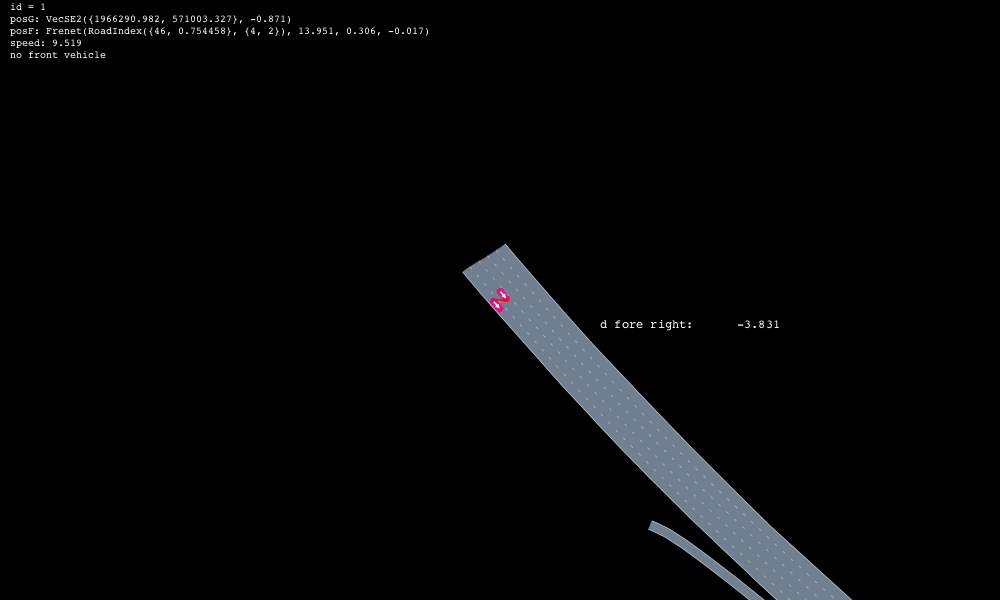

In [11]:
@manipulate for i in 0:nframes(rec)
    stats = [
        CarFollowingStatsOverlay(1, 2), 
        NeighborsOverlay(1, textparams = TextParams(x = 600, y_start=300))
    ]
    render(get!(scene, rec, -i), ROADWAY_101, stats)
end

In [12]:
function Base.length(x::Records.QueueRecord{Records.Entity{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}})
    return nframes(x)
end

In [13]:
td = convert(Trajdata, rec)

Trajdata(50 frames)

In [14]:
outpath = "/Users/wulfebw/.julia/v0.5/NGSIM/data/2_simple.txt"
open(io->write(io, MIME"text/plain"(), td), outpath, "w")